## 1. Importação do Dataset e analise rapida

Dataset: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

Será feito uma tarefa de classificação para encontrar a qualidade do vinho que vai de 0 a 10.

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [174]:
df = pd.read_csv("WineQT.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [175]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## 2. Pré-Processamento e Normalização.

Separação das features e a qualidade e normalização dos dados. Além da divisão entre treino e teste.

In [176]:
# Coluna id é inutil
df = df.drop('Id',axis=1)

# Quality é a coluna em que queremos prever
X = df.drop('quality', axis=1)
y = df['quality']

#normalização dos  e divird os dados
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")
print(f"Range das labels codificadas: {y_train.min()} a {y_train.max()}") # no dados original diz que vai de 0 a 10 mas na realidade so existe 6 valores nos dados.

Formato dos dados de treino: (800, 11)
Formato dos dados de teste: (343, 11)
Range das labels codificadas: 0 a 5


## 3. Definição e treinamento do modelo de rede neural
Definir uma rede neural densa para classificar a qualidade do vinho com base nas features que escolhi, que são todas as outras colunas tirando a quality. Os valores abaixo foram os melhores que consegui encontrar testando varias vezes.

In [210]:
# numero de classes
num_classes = len(np.unique(y_train))

x_in = keras.Input(shape=(X_train.shape[1],))

x = layers.Dense(32, activation="relu")(x_in)

x = layers.Dense(32, activation="relu")(x)

x_out = layers.Dense(num_classes, activation="sigmoid")(x)

model = keras.Model(inputs=x_in, outputs=x_out)

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

report = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                    batch_size=50,
                    epochs=20,
                    verbose=1)

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_51 (InputLayer)     │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638 (6.40 KB)

 Trainable params: 1,638 (6.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1196 - loss: 1.8270 - val_accuracy: 0.3528 - val_loss: 1.6419
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4059 - loss: 1.5608 - val_accuracy: 0.5015 - val_loss: 1.4333
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5175 - loss: 1.3549 - val_accuracy: 0.5481 - val_loss: 1.2765
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5269 - loss: 1.2438 - val_accuracy: 0.5685 - val_loss: 1.1630
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5711 - loss: 1.1207 - val_accuracy: 0.5685 - val_loss: 1.0864
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5831 - loss: 1.1100 - val_accuracy: 0.5860 - val_loss: 1.0414
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6063 - loss: 1.0557 - val_accuracy: 0.5948 - val_loss: 1.0136
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5996 - loss: 1.0254 - val_accuracy: 0.5977 - val_loss

## 4. Avaliação do modelo e interpretação
Avaliar o desempenho do modelo treinado no conjunto de teste e analisar as métricas de acurácia e loss

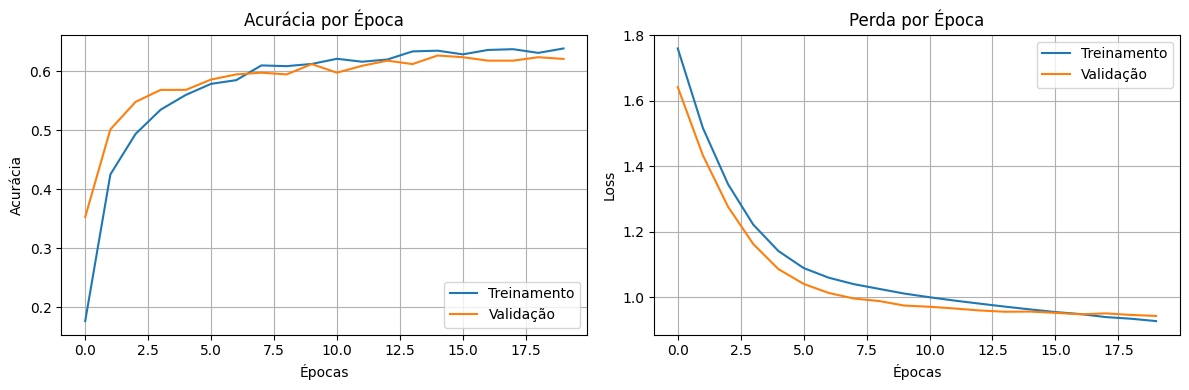

In [212]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(report.history['accuracy'], label='Treinamento')
plt.plot(report.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(report.history['loss'], label='Treinamento')
plt.plot(report.history['val_loss'], label='Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Como podemos ver, mesmo tentando varios valores não consegui chegar a um modelo que fosse muito bem, ficando ao redor de  0.6 de acuracia e 0.9 de loss, que não são valores ruims mas também não trazem muita garantia de acerto com esse modelo. Quando testei com outros valores muitas vezes o modelo dava um grande overfitting acertando muito mais no treinamento mas errando batante na validação, portanto deixarei os resultados acima.